In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
data = pd.read_excel('jester-data-3.xls',header=None)
data = data.rename({0:'Rate_count'},axis=1)
data['userId']=data.index+1

In [3]:
df =pd.melt(data.loc[:,1:] ,id_vars ='userId'  , value_name="rating")
df = df.rename({'variable':'JokesId'},axis=1)

In [4]:
df['rating'].replace(99.0,0,inplace=True)

<AxesSubplot:>

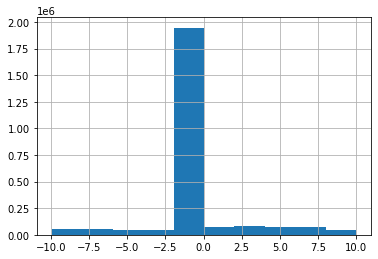

In [5]:
df['rating'].hist()

In [6]:
data

,Rate_count,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,userId
0,26,99.0,99.00,99.0,99.0,-1.65,99.00,-0.78,6.89,99.0,...,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.0,1
1,33,99.0,99.00,99.0,99.0,-9.27,99.00,-9.17,-8.59,99.0,...,99.0,-2.77,99.0,99.00,99.0,99.0,99.0,99.00,99.0,2
2,16,99.0,99.00,99.0,99.0,-6.12,99.00,-7.48,-7.77,99.0,...,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.0,3
3,24,99.0,0.05,99.0,99.0,-2.82,99.00,-4.85,-0.87,99.0,...,99.0,99.00,99.0,1.84,99.0,99.0,99.0,-4.08,99.0,4
4,22,99.0,99.00,99.0,99.0,-4.95,99.00,6.21,2.72,99.0,...,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24933,21,99.0,99.00,99.0,99.0,5.78,8.45,99.00,8.20,99.0,...,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.0,24934
24934,16,99.0,99.00,99.0,99.0,5.24,99.00,99.00,5.68,99.0,...,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.0,24935
24935,35,99.0,99.00,99.0,99.0,-3.93,99.00,-9.03,-2.67,99.0,...,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.0,24936
24936,21,99.0,99.00,99.0,99.0,9.42,9.66,99.00,9.17,99.0,...,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.0,24937


In [30]:
data_n=data.loc[:,1:]
data_n.replace(99.0,0,inplace=True)
data_n=data_n.set_index('userId')

In [31]:
data_n

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.00,0.0,0.0,-1.65,0.00,-0.78,6.89,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0
2,0.0,0.00,0.0,0.0,-9.27,0.00,-9.17,-8.59,0.0,0.00,...,0.0,0.0,-2.77,0.0,0.00,0.0,0.0,0.0,0.00,0.0
3,0.0,0.00,0.0,0.0,-6.12,0.00,-7.48,-7.77,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0
4,0.0,0.05,0.0,0.0,-2.82,0.00,-4.85,-0.87,0.0,0.00,...,0.0,0.0,0.00,0.0,1.84,0.0,0.0,0.0,-4.08,0.0
5,0.0,0.00,0.0,0.0,-4.95,0.00,6.21,2.72,0.0,-8.59,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24934,0.0,0.00,0.0,0.0,5.78,8.45,0.00,8.20,0.0,8.50,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0
24935,0.0,0.00,0.0,0.0,5.24,0.00,0.00,5.68,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0
24936,0.0,0.00,0.0,0.0,-3.93,0.00,-9.03,-2.67,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0


<h3>16 rated jokes in row [ 1 ] and 84 "99's" means not Rated

In [32]:
data_n.iloc[0].value_counts()

 0.00    74
 1.26     2
-2.57     1
 6.26     1
 4.42     1
 0.15     1
-2.23     1
-0.29     1
 6.89     1
-5.97     1
-0.19     1
 1.55     1
-7.52     1
 2.96     1
 1.36     1
-0.78     1
-1.65     1
 2.23     1
-1.31     1
-2.91     1
 3.50     1
-2.14     1
-3.98     1
-8.20     1
 1.17     1
-5.87     1
Name: 1, dtype: int64

<h1>Item Based

In [9]:
from sklearn.metrics.pairwise import linear_kernel

In [33]:
item_matrix = linear_kernel(data_n.T,data_n.T)

In [34]:
item_matrix = pd.DataFrame(item_matrix,index=data_n.columns,columns=data_n.columns)

In [35]:
def getItem(itemid,k):
    sim_item = item_matrix[itemid]
    top =sim_item.nlargest(k)
    return top 

In [38]:
item_id = 3
item = getItem(item_id,k=10)

In [39]:
items = pd.DataFrame({'JokesId':item.index,'similarity':item.values})
items

,JokesId,similarity
0,3,121.2005
1,58,94.9084
2,39,87.7128
3,26,87.2588
4,69,87.0072
5,42,86.3508
6,1,85.6038
7,52,81.4613
8,2,74.8456
9,81,65.7324


<h1>User based

In [40]:
user_matrix = linear_kernel(data_n,data_n)

In [41]:
user_matrix = pd.DataFrame(user_matrix,index=data_n.index,columns=data_n.index)
user_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,24929,24930,24931,24932,24933,24934,24935,24936,24937,24938
userId,,,,,,,,,,,,,,,,,,,,,
1,380.5206,122.0043,-31.8133,-11.8757,78.1516,-12.8785,63.5153,40.1574,-10.8731,5.1645,...,-24.5720,68.8645,-186.3263,-41.4981,-48.9088,-86.1097,51.5384,116.0283,-16.4734,60.2534
2,122.0043,1778.5546,467.9187,146.1892,-350.7982,-593.2410,411.6444,-367.1127,-97.4630,-487.0859,...,-272.8386,-423.6832,-833.4671,-327.4288,-343.5911,-600.7634,-426.9902,-104.7924,-934.8140,-848.6013
3,-31.8133,467.9187,772.4729,54.9651,4.4599,-188.5442,364.1994,-66.2368,320.0649,-122.8459,...,-119.5778,-63.3488,-573.9812,-88.4028,-189.6545,-247.6055,-168.6245,-1.2705,-302.1823,27.1513
4,-11.8757,146.1892,54.9651,202.1940,-103.5958,-90.5886,70.3020,-90.7399,56.8591,-155.3159,...,26.5406,-70.2597,-74.6291,-56.1888,-5.9985,-22.4897,-48.4751,-14.3652,-88.2200,-48.7861
5,78.1516,-350.7982,4.4599,-103.5958,1092.0609,234.6663,8.5312,0.3556,31.3627,100.7427,...,-22.1337,45.2634,165.0657,-24.7186,-25.8276,-253.8363,202.7111,133.1303,31.3547,351.7646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24934,-86.1097,-600.7634,-247.6055,-22.4897,-253.8363,159.5707,-316.0409,37.6571,-200.7104,291.4368,...,299.9794,338.5109,776.4294,305.4954,463.3465,1455.6341,217.1651,-161.9762,779.1460,270.5741
24935,51.5384,-426.9902,-168.6245,-48.4751,202.7111,199.4319,-116.7326,171.0109,25.4141,210.0175,...,140.2296,176.9580,379.4071,8.5904,258.4824,217.1651,713.4533,132.6848,114.6422,431.2900
24936,116.0283,-104.7924,-1.2705,-14.3652,133.1303,-71.4668,118.6333,353.4391,378.1723,-48.7115,...,46.1197,130.0228,-17.7193,223.4520,42.0957,-161.9762,132.6848,1098.4243,93.0482,436.9048


In [42]:
def getuser(userid,k):
    sim_user = user_matrix[userid]
    top =sim_user.sort_values(ascending=False)
    return top[:k]

In [45]:
top_user = getuser(1,10)
pd.DataFrame({'UserId':top_user.index,'similarity':top_user.values})

,UserId,similarity
0,1,380.5206
1,16565,302.1180
2,12746,301.5931
3,8272,285.6333
4,17804,283.7891
5,17755,282.6069
6,5624,273.4035
7,22631,270.9659
8,19185,268.9287
9,24903,256.0498


<h1>Model Based

In [46]:
from surprise.model_selection import train_test_split,cross_validate
from surprise import SVD,Reader,Dataset,accuracy

In [47]:
reader =  Reader(rating_scale=(-10,10))
dd = Dataset.load_from_df(df,reader)

In [48]:
trainset , testset = train_test_split(dd,test_size=0.20,random_state=7)

In [49]:
model = SVD(lr_all=0.001,n_factors=50)

In [50]:
model.fit(trainset)

In [51]:
pred = model.test(testset)

In [57]:
pred[17]

Prediction(uid=13803, iid=25, r_ui=0.0, est=-0.05343465935970448, details={'was_impossible': False})

In [53]:
accuracy.rmse(pred)

RMSE: 2.3931


2.3931094827378256

In [63]:
def precision_k(predictions,k=10,threshold=0.0):
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls=dict()
    for uid , user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        # print(urerRating[1])
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])


        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])
        precisions[uid] =  n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions,recalls


In [64]:
# precisions
# t=np.linspace(-10.,10.,50)
# # t=[2.5]
# for i in t:
precisions,recalls =precision_k(pred,k=5,threshold=0.0)

p=(sum(prec for prec in precisions.values()) / len(precisions))
r=(sum(rec for rec in recalls.values()) / len(recalls))
print(f'precision {p} recall {r} on threshold {0} \n\n')

precision 0.8308986285988382 recall 0.21891649808249394 on threshold 0 




In [85]:
from collections import defaultdict
# def get_top_n(predictions, n=10):
#     # First map the predictions to each user.
#     top_n = defaultdict(list)
#     for uid, iid, true_r, est, _ in predictions:
#         # print(iid,est)
#         top_n[uid].append((iid, est))

#     # Then sort the predictions for each user and retrieve the k highest ones.
#     for uid, user_ratings in top_n.items():
#         user_ratings.sort(key=lambda x: x[1], reverse=True)
#         top_n[uid] = user_ratings[:n]

#     return top_n
    
def GetTopN(predictions, n=10, minimumRating=0.0, criterion='est'):
    topN = defaultdict(list)
    
    for index, row in predictions.iterrows():
        # print(index,row)
        if (row[criterion] >= minimumRating):
            topN[int(row.uid)].append((int(row.iid), row[criterion]))

    for userID, ratings in topN.items():
        ratings.sort(key=lambda x: x[1], reverse=True)
        topN[int(userID)] = ratings[:n]

    return topN

In [110]:
# top_n = get_top_n(pred, n=3)
pr = pd.DataFrame(pred)
top_n=GetTopN(pr.iloc[:,:-1],n=3)
len(top_n)

23608

In [67]:
 import re

In [68]:
def getJokes(file):
    path = f'./jester_dataset_1_joke_texts/jokes/init{file}.html'
    with open(path, "r", encoding='utf-8') as f:
        text= f.read()
        # print(text)
        start = text.find("<!--begin of joke -->") + len("<!--begin of joke -->")
        end = text.find("<!--end of joke -->")
        t =(text[start:end])
        return t

In [130]:
def recommed(uid):
    jokesid=set()
    for val in top_n[uid]:
        jokesid.add(val[0])
    print(jokesid)
    for file in jokesid:
        print(f'{"-"*40}JokeId {file}{"-"*45} {getJokes(file)}{"-"*100}\n\n')


In [133]:
recommed(7)

{66, 4, 12}
----------------------------------------JokeId 66--------------------------------------------- 
A lawyer opened the door of his BMW, when suddenly a car came along
and hit the door, ripping it off completely.  When the police arrived
at the scene, the lawyer was complaining bitterly about the damage to
his precious BMW.  
<p>"Officer, look what they've done to my Beeeeemer!!!", he whined.  
<p>"You lawyers are so materialistic, you make
me sick!!!"  retorted the officer.  "You're so worried about your
stupid BMW, that you didn't even notice that your left arm was ripped
off!!!"  
<p>"Oh my gaaaad...", replied the lawyer, finally noticing the
bloody left shoulder where his arm once was.  "Where's my
Rolex???!!!!"
----------------------------------------------------------------------------------------------------


----------------------------------------JokeId 4--------------------------------------------- 
Q. What's the difference between a man and a toilet? 
<P>
A. A toile

In [301]:
final = pd.DataFrame({'u':userid,'j':jokesid})
final

,u,j
0,24,{50}
1,18,{50}
2,31,{27}
3,25,{50}
4,29,{50}
5,22,{50}
6,33,{27}
7,28,{27}
8,35,{27}
9,30,{27}


In [137]:
cross_validate(model,dd,cv=3)

{'test_rmse': array([2.5738067 , 2.58743182, 2.60043542]),
 'test_mae': array([1.20890669, 1.2658846 , 1.30227421]),
 'fit_time': (145.22379231452942, 185.27940273284912, 230.84769105911255),
 'test_time': (8.394989013671875, 15.545635461807251, 13.717051982879639)}